In [73]:
import pandas as pd
model_data=pd.read_csv("./model_data.csv")
vali_data=pd.read_csv("./vali_data.csv")

In [74]:
model_data.drop("Unnamed: 0",axis=1,inplace=True)
vali_data.drop("Unnamed: 0",axis=1,inplace=True)

In [75]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.073735,76,0,0.005186,5977.000000,4,0,0,0,0.000000
1,1,0.259279,53,0,0.243634,12350.118651,13,0,1,0,0.993021
2,1,0.543920,53,0,1.341643,1548.070860,4,0,0,0,0.678477
3,0,0.068944,45,0,2412.000000,0.080000,14,0,1,0,0.000000
4,0,0.043218,68,0,0.580692,8265.000000,7,0,2,0,0.000000


In [76]:
vali_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.017775,37,0,0.578967,5400.000000,14,0,2,0,0.000000
1,1,1.324594,30,0,58.000000,60.460000,2,2,0,1,0.000000
2,1,0.563499,50,1,0.537321,9900.724309,14,0,2,0,0.362155
3,1,1.000893,48,1,0.330562,5146.647447,3,4,1,0,3.676276
4,1,0.686434,28,0,0.144121,3180.000000,6,0,0,0,1.000000


In [77]:
#以“age”为例子，进行分箱。
"""
pd.qcut，基于分位数的分箱函数，本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q：要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引，元素为分到的箱子的Series
现在返回两个值：每个样本属于哪个箱子，以及所有箱子的上限和下限
"""
model_data["qcut"],updown=pd.qcut(model_data["age"],retbins=True,q=20)
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.073735,76,0,0.005186,5977.000000,4,0,0,0,0.000000,"(74.0, 109.0]"
1,1,0.259279,53,0,0.243634,12350.118651,13,0,1,0,0.993021,"(52.0, 54.0]"
2,1,0.543920,53,0,1.341643,1548.070860,4,0,0,0,0.678477,"(52.0, 54.0]"
3,0,0.068944,45,0,2412.000000,0.080000,14,0,1,0,0.000000,"(43.0, 45.0]"
4,0,0.043218,68,0,0.580692,8265.000000,7,0,2,0,0.000000,"(64.0, 68.0]"


In [78]:
#所有箱子的上限和下限
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  47.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 109.])

In [79]:
#统计每个分箱中的0.1的数量
coount_y0=model_data[model_data["SeriousDlqin2yrs"]==0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
coount_y1=model_data[model_data["SeriousDlqin2yrs"]==1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [80]:
num_bins=[*zip(updown,updown[1:],coount_y0,coount_y1)]
num_bins

[(21.0, 28.0, 4553, 8024),
 (28.0, 31.0, 3756, 6366),
 (31.0, 34.0, 4300, 7317),
 (34.0, 36.0, 3097, 5017),
 (36.0, 39.0, 5454, 8049),
 (39.0, 41.0, 4226, 6169),
 (41.0, 43.0, 4316, 6116),
 (43.0, 45.0, 4672, 6322),
 (45.0, 47.0, 5106, 6896),
 (47.0, 48.0, 2611, 3360),
 (48.0, 50.0, 5217, 6598),
 (50.0, 52.0, 5037, 6195),
 (52.0, 54.0, 5034, 5393),
 (54.0, 56.0, 4933, 4406),
 (56.0, 58.0, 4836, 3709),
 (58.0, 61.0, 7137, 5205),
 (61.0, 64.0, 7550, 3360),
 (64.0, 68.0, 7101, 2497),
 (68.0, 74.0, 7274, 2015),
 (74.0, 109.0, 8289, 1425)]

In [81]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.073735,76,0,0.005186,5977.000000,4,0,0,0,0.000000,"(74.0, 109.0]"
1,1,0.259279,53,0,0.243634,12350.118651,13,0,1,0,0.993021,"(52.0, 54.0]"
2,1,0.543920,53,0,1.341643,1548.070860,4,0,0,0,0.678477,"(52.0, 54.0]"
3,0,0.068944,45,0,2412.000000,0.080000,14,0,1,0,0.000000,"(43.0, 45.0]"
4,0,0.043218,68,0,0.580692,8265.000000,7,0,2,0,0.000000,"(64.0, 68.0]"


In [82]:
#分箱结束，获得WOE和IV
import numpy as np
def get_woe(num_bins):
    columns=["min","max","count_0","count_1"]
    df=pd.DataFrame(num_bins,columns=columns)
    df["total"]=df.count_0+df.count_1
    df["percentage"]=df.total/df.total.sum()
    df["bad_rate"]=df.count_1/df.total
    df["good%"]=df.count_0/df.count_0.sum()
    df["bad%"]=df.count_1/df.count_1.sum()
    df["WOE"] =np.log(df["good%"]/df["bad%"])
    return df

In [83]:
df=get_woe(num_bins)

In [84]:
df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,WOE
0,21.0,28.0,4553,8024,12577,0.060195,0.637990,0.043570,0.076830,-0.567225
1,28.0,31.0,3756,6366,10122,0.048445,0.628927,0.035943,0.060954,-0.528191
2,31.0,34.0,4300,7317,11617,0.055600,0.629853,0.041149,0.070060,-0.532160
3,34.0,36.0,3097,5017,8114,0.038834,0.618314,0.029637,0.048038,-0.482973
4,36.0,39.0,5454,8049,13503,0.064627,0.596090,0.052192,0.077069,-0.389773
5,39.0,41.0,4226,6169,10395,0.049752,0.593458,0.040441,0.059068,-0.378855
6,41.0,43.0,4316,6116,10432,0.049929,0.586273,0.041302,0.058560,-0.349154
7,43.0,45.0,4672,6322,10994,0.052618,0.575041,0.044709,0.060533,-0.303023
8,45.0,47.0,5106,6896,12002,0.057443,0.574571,0.048862,0.066029,-0.301100
9,47.0,48.0,2611,3360,5971,0.028578,0.562720,0.024986,0.032172,-0.252782


In [85]:
# 计算IV的值
def get_IV(df):
    rate=df["good%"]-df["bad%"]
    iv=np.sum(rate*df.WOE)
    return iv

In [86]:
iv=get_IV(df)

In [87]:
iv

0.3644011237160956

In [88]:
#查看两个箱子之间的关联程度,获取 num_bins_两两之间的卡方检验的置信度（或卡方值）
num_bins_=num_bins.copy()
import matplotlib.pyplot as plt
import scipy.stats
x1=num_bins_[1][2:]
x2=num_bins_[2][2:]
# 0 返回 chi2 值，1 返回 p 值。
chi2= scipy.stats.chi2_contingency([x1,x2])[0]
pv=scipy.stats.chi2_contingency([x1,x2])[1]

In [89]:
chi2

0.01610183930368714

In [90]:
pv

0.8990250687868199

In [91]:
len(num_bins_)

20

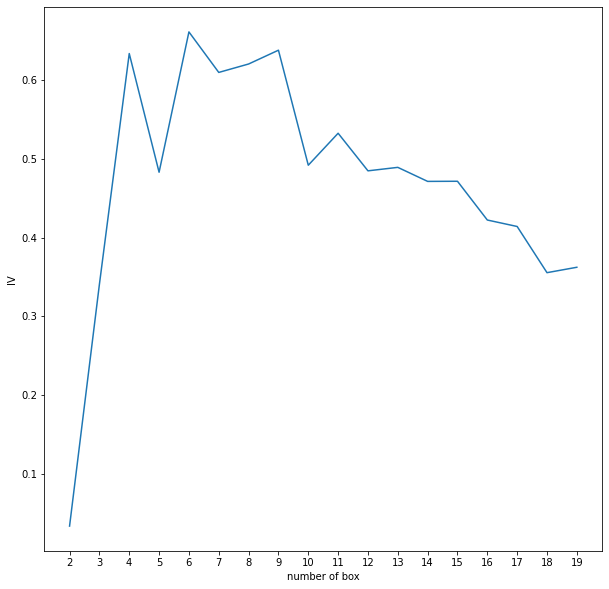

In [92]:
IV = []
axisx = []
while len(num_bins_)>2:
    pvs=[]
    for i in range(len(num_bins_)-1):
        x1=num_bins_[i][2:]
        x2=num_bins_[i+1][2:]
        pv=scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    # 通过 p 值进行处理。合并 p 值最大的两组
    i=pvs.index(max(pvs))
    num_bins_[i:i+2]=[(num_bins_[i][0],
                       num_bins_[i+1][1],
                       num_bins_[i][2]+num_bins_[i+1][2],
                       num_bins_[i][3]+num_bins_[i][3])]
    bins_df=get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_IV(bins_df))
plt.figure(figsize=(10,10))
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]